In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [24]:
%matplotlib inline

In [25]:
X = pd.read_pickle("./X-2s.pkl")
y = pd.read_pickle("./y-2s.pkl")
espl = pd.read_pickle("./espl.pkl")

### Analisi esplorativa con `PCA`, `ICA`, `t-SNE`.

In [26]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

In [27]:
from funzioni import Whiten

In [28]:
# Sbiancamento dei dati
esplWh = Whiten().fit_transform(espl)

In [29]:
pca = PCA(n_components=2, random_state=42)
esplPCA = pca.fit_transform(esplWh)

In [30]:
ica = FastICA(n_components=2, random_state=42)
esplICA = ica.fit_transform(esplWh)

In [31]:
tsne = TSNE(n_components=2, random_state=42)
esplTSNE = tsne.fit_transform(esplWh)

In [32]:
# Funzione che produce lo scatterplot con i colori per i gruppi dati da y
from funzioni import ScatterGroup, MatriceConfusione

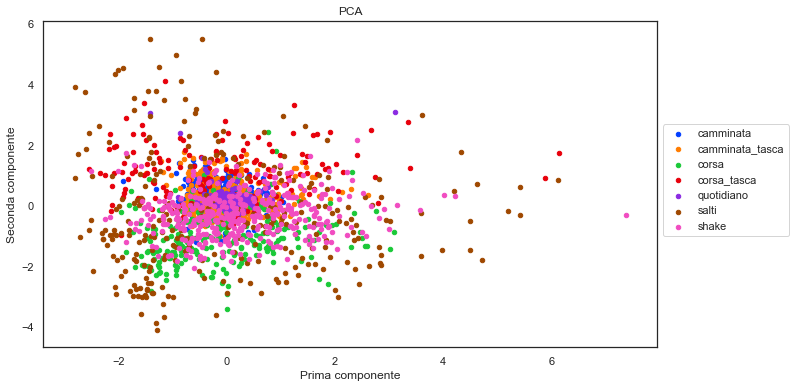

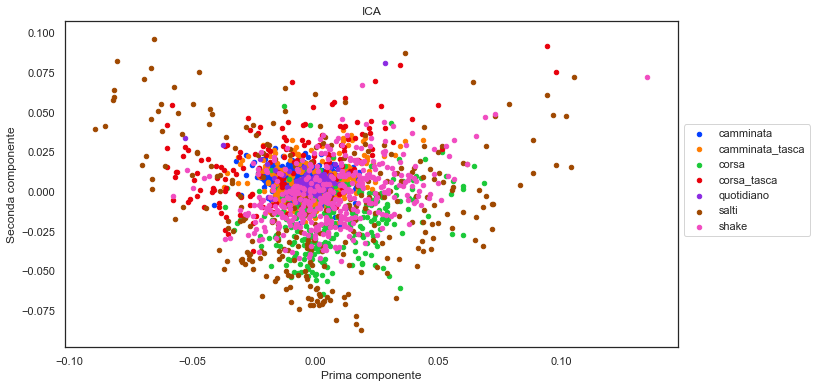

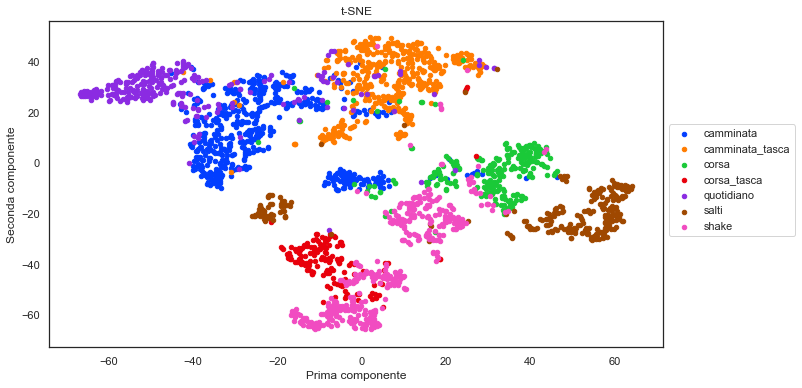

In [33]:
for title,dat in zip(["PCA","ICA","t-SNE"], [esplPCA, esplICA, esplTSNE]):
    fig, ax = ScatterGroup(pd.DataFrame(dat, columns=["Prima componente", "Seconda componente"]),
                       grp=y, palette="bright")
    fig.set_figwidth(11)
    fig.set_figheight(6)
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(1,0.7))
    plt.savefig("./figure/"+title+".png", bbox_inches="tight", dpi=180)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
X_train, X_val, y_train, y_val = train_test_split(espl, y, test_size=0.25, random_state=42)

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Accuratezza LDA: 79.2%
[[128   2  13   0   0   0   2]
 [  8  92   0   0   0   0   0]
 [  5   4  55   0   0   0   1]
 [  0   0   0  33   0   0  10]
 [ 39   5   0   0  25   0   0]
 [  3   2   5   0   0  54   0]
 [  0  10   8   4   0   0  75]]


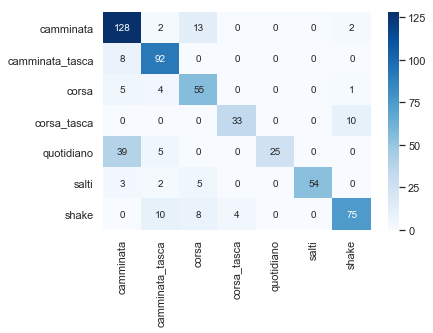

In [37]:
y_pred_lda = lda.predict(X_val)
print("Accuratezza LDA: {:.1f}%".format(100*accuracy_score(y_val, y_pred_lda)))
print(confusion_matrix(y_val, y_pred_lda))
MatriceConfusione(y_val, y_pred_lda)

In [38]:
temp = y_val.unique()

In [39]:
temp.sort()

In [40]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

Accuratezza QDA: 93.0%
[[127   5   0   0   9   1   3]
 [  0  97   0   0   3   0   0]
 [  0   0  62   0   0   1   2]
 [  0   0   0  38   0   1   4]
 [  5   4   0   0  60   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   1   2   0   0  94]]


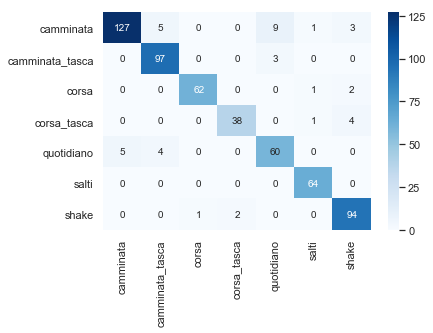

In [41]:
y_pred_qda = qda.predict(X_val)
print("Accuratezza QDA: {:.1f}%".format(100*accuracy_score(y_val, y_pred_qda)))
print(confusion_matrix(y_val, y_pred_qda))
MatriceConfusione(y_val, y_pred_qda)